<a href="https://colab.research.google.com/github/Tensai-Pro/SRI-PracticeTasks/blob/master/BERTopic%20for%20chats/BERTopic%20for%20chats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# !pip install bertopic

In [4]:
# !pip install transformers

In [5]:
# !pip install datasets

In [6]:
# !pip install --upgrade accelerate

In [1]:
import pandas as pd
import numpy as np

# Подготовка данных

In [2]:
data = pd.read_csv('/content/data_web.csv', names=['date', 'from', 'text'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    689 non-null    object
 1   from    689 non-null    object
 2   text    689 non-null    object
dtypes: object(3)
memory usage: 16.3+ KB


In [3]:
docs = data['text'].tolist()
print(type(docs))
print(docs[:3])

<class 'list'>
['Настройка https на localhost . ', 'Новый сервис капчи от яндекса на замену сервису ReCAPTCHA от Гугла. Кстати прикольно, не думал, что капча это вариация на тему теста Тьюринга. Если не знаете что это за тест, рекомендую погуглить, развивает кругозор,   . ', 'Введение в svg анимацию доя верстальщиков  . ']


# Подготовка модели BERTopic

In [4]:
from bertopic import BERTopic

In [5]:
from transformers.pipelines import pipeline

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
import nltk;
nltk.download('stopwords');
from nltk.corpus import stopwords;
stopwords = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

Чистая модель rubert_tiny

In [ ]:
embedding_model = pipeline('feature-extraction', model='cointegrated/rubert-tiny2')

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
topic_model = BERTopic(language="multilingual", embedding_model=embedding_model,
                       vectorizer_model=vectorizer_model,
                       calculate_probabilities=True, verbose=True)

topics, probs = topic_model.fit_transform(docs)

100%|██████████| 689/689 [00:06<00:00, 106.98it/s]
2023-05-13 15:54:05,722 - BERTopic - Transformed documents to Embeddings
2023-05-13 15:54:18,606 - BERTopic - Reduced dimensionality
2023-05-13 15:54:18,655 - BERTopic - Clustered reduced embeddings


# Извлечение тем

In [ ]:
freq = topic_model.get_topic_info(); freq.head(10)

,Topic,Count,Name
0,0,664,0_это_коллеги_очень_спасибо
1,1,25,1_позиция абсолютная_позиция_группы позиция_са...


In [ ]:
topic_model.get_topic(0)

[('это', 0.029800860487000688),
 ('коллеги', 0.014868404811310723),
 ('очень', 0.013435492129944578),
 ('спасибо', 0.012331723320136684),
 ('js', 0.009640960766043613),
 ('сколько', 0.009241183131225064),
 ('всем', 0.008836974315738884),
 ('который', 0.008428086315968074),
 ('google', 0.008014241902650541),
 ('проект', 0.008014241902650541)]

In [ ]:
topic_model.update_topics(docs, n_gram_range=(1, 2))

In [ ]:
freq = topic_model.get_topic_info(); freq.head(10)

,Topic,Count,Name
0,0,664,0_не_на_что_как
1,1,25,1_позиция абсолютная_позиция_группы позиция_са...


# Rubert_tiny

## Подготовка данных из huggingface hub

In [9]:
from datasets import load_dataset

In [5]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.cache/huggingface

In [10]:
dataset = load_dataset('YuRayne/sri_pracrice_2')

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
dataset

DatasetDict({
    train: Dataset({
        features: ['date', 'from', 'text'],
        num_rows: 689
    })
})

In [12]:
# dataset = dataset['train'].train_test_split(test_size=0.2)

In [13]:
# dataset

In [14]:
# dataset['train']

In [15]:
len(dataset['train']['date'])

689

In [16]:
dataset['train'][10]

{'date': '2022-07-04 09:30:50',
 'from': 'Антон Евтюшкин',
 'text': 'Статья обзор сервиса Github Copilot, искусственного интеллекта, который помогает вам писать код.   . '}

## Переобучение модели

In [17]:
from transformers import (AutoModel, AutoModelForMaskedLM,
                          AutoTokenizer, LineByLineTextDataset,
                          DataCollatorForLanguageModeling,
                          Trainer, TrainingArguments)

In [18]:
tokenizer = AutoTokenizer.from_pretrained('cointegrated/rubert-tiny2')
model = AutoModelForMaskedLM.from_pretrained('cointegrated/rubert-tiny2')

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
# разбивает датасет на батчи
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [16]:
# берет каждую строчку текстового файла
train_dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="/content/web_train.txt",
    block_size=256)

test_dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="/content/web_test.txt",
    block_size=256)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [17]:
trained_path = 'train/rubert-tiny2_trained'

training_args = TrainingArguments(
    output_dir=trained_path,
    overwrite_output_dir=True,
    num_train_epochs=2,
    save_steps=5000,
    save_total_limit=2,
    prediction_loss_only=True,
)

In [18]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

In [19]:
saved_path = 'trained_path/'
trainer.train()
trainer.save_model(saved_path)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


## Как работает AutoTokenizer и AutoModel

In [23]:
import torch

In [ ]:
def tokenize(text, tokenizer):
  print()
  # делит на слова (токены)
  print(tokenizer.tokenize(text))

  t = tokenizer(text[0], text[1], padding=True, truncation=True)
  # делит на числа
  print('t:', t)

  encoded_seq = t['input_ids']
  print('encoded_seq:', encoded_seq)

  decoded_seq = tokenizer.decode(encoded_seq)
  print('decoded_seq:', decoded_seq)

tokenize(['привет мир.', 'Как дела?'], tokenizer)


['привет', 'мир', '.', 'Как', 'дела', '?']
t: {'input_ids': [2, 32840, 9311, 18, 3, 7063, 7843, 35, 3], 'token_type_ids': [0, 0, 0, 0, 0, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}
encoded_seq: [2, 32840, 9311, 18, 3, 7063, 7843, 35, 3]
decoded_seq: [CLS] привет мир. [SEP] Как дела? [SEP]


In [ ]:
def tokenize_batch(text, tokenizer):
  print()

  encoded_inputs = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
  print('encoded_inputs:')
  print(encoded_inputs)

tokenize_batch(['привет.', 'Как у тебя дела?', 'утка ходит'], tokenizer)


encoded_inputs:
{'input_ids': tensor([[    2, 32840,    18,     3,     0,     0,     0],
        [    2,  7063,   331, 29852,  7843,    35,     3],
        [    2, 78415,   872, 38665,     3,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0]])}


Функция из документации к rubert_tiny

In [ ]:
model_original = AutoModel.from_pretrained("cointegrated/rubert-tiny2")

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def embed_bert_cls(text, model, tokenizer):
  t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')

  with torch.no_grad():
    # то же самое, что и model(**t)
    model_output = model(**{k: v.to(model.device) for k, v in t.items()})

  print(model_output.last_hidden_state.shape)

  embeddings = model_output.last_hidden_state[:, 0, :]
  pooler = model_output.pooler_output
  # print(embeddings.shape)
  # print(pooler.shape)

  # print(embeddings)
  embeddings = torch.nn.functional.normalize(embeddings)
  return embeddings[0].cpu().numpy()

print(embed_bert_cls('привет мир', model_original, tokenizer)[:5])

torch.Size([1, 4, 312])
[ 0.01934799 -0.02039804 -0.00845532 -0.06858292 -0.00167201]


# t-SNE

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def tsne_plot(embeddings):
  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
  points = tsne_model.fit_transform(embeddings)

  x = []
  y = []
  for point in points:
    x.append(point[0])
    y.append(point[1])

  plt.figure(figsize=(16, 16)) 
  for i in range(len(x)):
        plt.scatter(x[i],y[i])
        # plt.annotate(labels[i],
        #              xy=(x[i], y[i]),
        #              xytext=(5, 2),
        #              textcoords='offset points',
        #              ha='right',
        #              va='bottom')
  
  plt.show()

# BERTopic с дообученной моделью векторного представления

## Извлечение векторных представлений

In [19]:
model_custom = AutoModel.from_pretrained('/content/trained_path', output_hidden_states=False)

Some weights of the model checkpoint at /content/trained_path were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at /content/trained_path and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']

In [20]:
docs[3]

'Хороший интерактивный мануал по использованию Git  . '

In [21]:
def embed_bert_cls_custom(text, model, tokenizer):
  t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')

  with torch.no_grad():
      model_output = model(**{k: v.to(model.device) for k, v in t.items()})

  embeddings = model_output.last_hidden_state[:, 0, :]
  embeddings = torch.nn.functional.normalize(embeddings)
  return embeddings[0].cpu().numpy()

In [24]:
print(embed_bert_cls_custom(docs[0], model_custom, tokenizer).shape)

(312,)


In [25]:
docs_embeddings = [embed_bert_cls_custom(doc, model_custom, tokenizer) for doc in docs]

In [26]:
print(type(docs_embeddings))
print(len(docs_embeddings))
print(docs_embeddings[0].shape)

<class 'list'>
689
(312,)


In [27]:
docs_embeddings = np.array(docs_embeddings)
print(type(docs_embeddings))
print(docs_embeddings.shape)

<class 'numpy.ndarray'>
(689, 312)


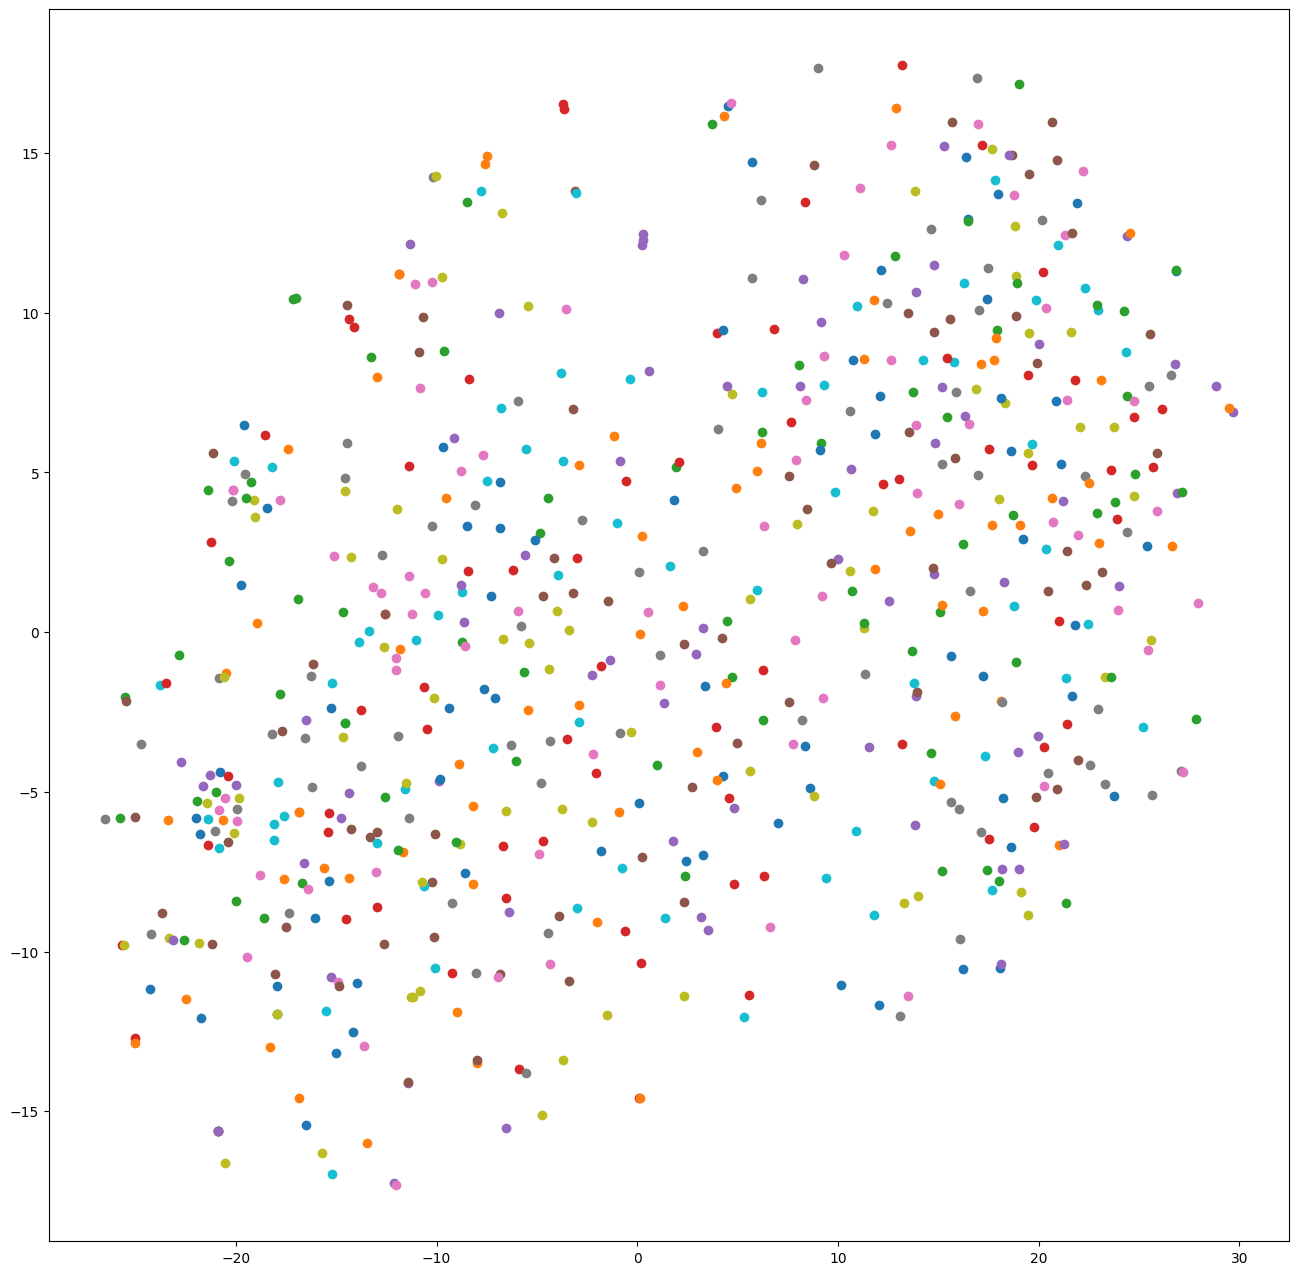

In [31]:
tsne_plot(docs_embeddings)

## Извлечение тем

In [32]:
bertopic_model = BERTopic(language="multilingual", vectorizer_model=vectorizer_model)
topics, probs = bertopic_model.fit_transform(docs, docs_embeddings)

In [33]:
freq2 = bertopic_model.get_topic_info(); freq2.head(10)

,Topic,Count,Name
0,0,660,0_это_коллеги_очень_спасибо
1,1,29,1_равно_равно голова_верх_аршинов равно


In [34]:
bertopic_model.get_topic(1)

[('равно', 0.7682395726004714),
 ('равно голова', 0.4570559286132247),
 ('верх', 0.4570559286132247),
 ('аршинов равно', 0.4570559286132247),
 ('аршинов', 0.4570559286132247),
 ('группы такая', 0.4570559286132247),
 ('возможность верх', 0.4570559286132247),
 ('верх аршинов', 0.4570559286132247),
 ('равно равно', 0.4570559286132247),
 ('сайтописец', 0.4570559286132247)]

# Twhin model

In [35]:
tokenizer_twhin = AutoTokenizer.from_pretrained('Twitter/twhin-bert-base')
model_twhin = AutoModel.from_pretrained('Twitter/twhin-bert-base')

Some weights of the model checkpoint at Twitter/twhin-bert-base were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at Twitter/twhin-bert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weig

In [36]:
# text_example = "I'm using TwHIN-BERT! #TwHIN-BERT #NLP"
text_example = docs[3]

In [ ]:
inputs = tokenizer_twhin.tokenize(text_example)

Здесь нет [CLS] токенов

In [ ]:
inputs

['▁Хорош',
 'ий',
 '▁интерактив',
 'ный',
 '▁',
 'ману',
 'ал',
 '▁по',
 '▁использован',
 'ию',
 '▁G',
 'it',
 '▁',
 '.']

In [ ]:
inputs = tokenizer_twhin(text_example, return_tensors='pt')

In [ ]:
inputs

{'input_ids': tensor([[     0, 189611,    983, 175419,   2192,      6, 131816,   3844,    129,
         136383,   4256,    527,    217,      6,      5,      2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
# эта строчка — то, что действительно передаётся в модель через **
# outputs = model(inputs['input_ids'], inputs['attention_mask'])
outputs = model_twhin(**inputs)

In [ ]:
print(type(outputs))

<class 'transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions'>


In [ ]:
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [ ]:
outputs.last_hidden_state.shape

torch.Size([1, 16, 768])

In [ ]:
weighted_outputs = outputs.last_hidden_state.mean(axis=1)

In [ ]:
weighted_outputs.shape

torch.Size([1, 768])

## Извлечение векторных представлений

In [37]:
def embed_weighted(text, model, tokenizer):
  tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt')

  with torch.no_grad():
      outputs = model(**tokens)

  embeddings = outputs.last_hidden_state.mean(axis=1)
  # print(embeddings[0][:5])
  embeddings = torch.nn.functional.normalize(embeddings)
  # print(embeddings[0][:5])
  return embeddings[0].numpy()

In [38]:
embed = embed_weighted(text_example, model_twhin, tokenizer_twhin)
print(embed[:5])
print(embed.shape)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[-0.01275232  0.06367259  0.01556225  0.11286027  0.01879515]
(768,)


In [39]:
docs[3]

'Хороший интерактивный мануал по использованию Git  . '

In [40]:
docs_embeddings = [embed_weighted(doc, model_twhin, tokenizer_twhin) for doc in docs]

In [41]:
print(len(docs_embeddings))
print(docs_embeddings[0].shape)

689
(768,)


In [42]:
docs_embeddings = np.array(docs_embeddings)
print(docs_embeddings.shape)

(689, 768)


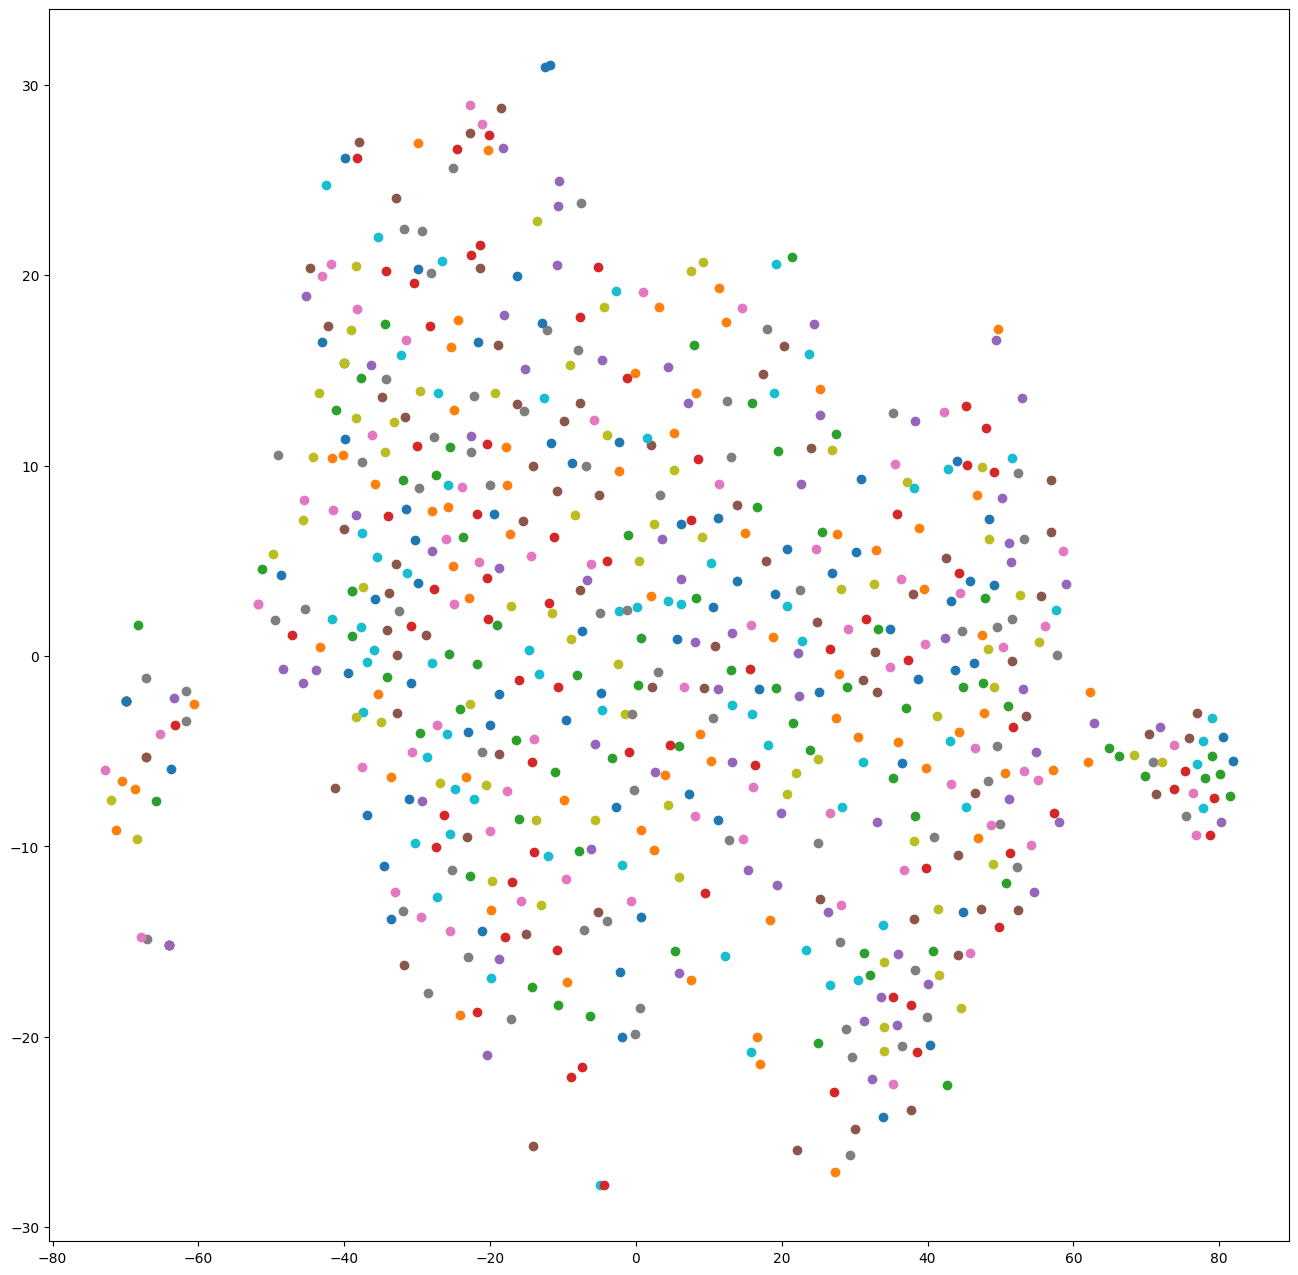

In [43]:
tsne_plot(docs_embeddings)

## Извлечение тем

In [44]:
bertopic_model_twhin = BERTopic(language="multilingual", vectorizer_model=vectorizer_model)
topics, probs = bertopic_model_twhin.fit_transform(docs, docs_embeddings)

In [45]:
freq3 = bertopic_model_twhin.get_topic_info(); freq3.head(10)

,Topic,Count,Name
0,0,615,0_это_коллеги_очень_спасибо
1,1,45,1_via news_generated_via_news
2,2,29,2_это_лампочку_нужно_сколько


In [49]:
bertopic_model_twhin.get_topic(2)

[('это', 0.02326945422023754),
 ('лампочку', 0.020534788991719743),
 ('нужно', 0.020050683331114285),
 ('сколько', 0.019428046787124065),
 ('поменять', 0.018080512643094307),
 ('поменять лампочку', 0.018080512643094307),
 ('нужно поменять', 0.016821876892462964),
 ('код', 0.013200935780391262),
 ('российской федерации', 0.01289474955362649),
 ('российской', 0.01289474955362649)]

# Методы оценки качества кластеризации

In [63]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [55]:
labels = bertopic_model_twhin.topics_

## Silhouette Coefficient

Silhouette Coefficient рассчитывается с использованием среднего внутрикластерного расстояния и среднего расстояния между ближайшими кластерами для каждого образца.

Диапазон значений: [0-1]. 

Чем выше значение, тем лучше кластеры.

In [59]:
silhouette_score = silhouette_score(docs_embeddings, labels, metric='euclidean')
silhouette_score

0.3307857

## Davies-Bouldin Score

Davies-Bouldin Score — среднее сходство между кластерами, т.е. мера, которая сравнивает расстояние между кластерами с размером самих кластеров. 

Чем меньше значение, тем лучше (0 - самый лучший результат).

In [62]:
db_score = davies_bouldin_score(docs_embeddings, labels)
db_score

1.0413904538584011

## Calinski-Harabasz Index

Calinski-Harabasz Index — насколько объект похож на свой собственный кластер (cohesion) по сравнению с другими кластерами (separation). 

Cohesion оценивается на основе расстояний от точек данных в кластере до центроида кластера.

Separation оценивается на основе расстояния центроидов кластеров от глобального центроида(?).

Чем выше значение, тем лучше.

In [64]:
ch_score = calinski_harabasz_score(docs_embeddings, labels)
ch_score

110.59768394735426